In [ ]:
import pandas as pd
rawdata = pd.read_csv('/content/diabetes.csv')
rawdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import numpy as np
from collections import Counter


datanames = rawdata.columns
print("資料欄位名稱：" ,datanames)

data = rawdata.to_numpy()
print("\n資料維度：", data.shape)
featurenames = datanames[0:8]
print("特徵名稱：" ,featurenames)

feature = np.delete(data, 8, axis=1) 
label = data[:,8]

print("\n資料集類別數量：%s" %Counter(label))


df = pd.DataFrame(feature, columns=featurenames)
label_name = np.array(['Non-Diabetics', 'Diabetics'])
df['label'] = np.array([label_name[i] for i in label.astype(int)])


資料欄位名稱： Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

資料維度： (768, 9)
特徵名稱： Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

資料集類別數量：Counter({0.0: 500, 1.0: 268})


In [ ]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(feature, label, random_state = 0, test_size = 0.2)

print("訓練集數量", len(train_x))
print("測試集數量", len(test_x))
print("訓練集類別數量：%s" %Counter(train_y))
print("測試集類別數量：%s" %Counter(test_y))


訓練集數量 614
測試集數量 154
訓練集類別數量：Counter({0.0: 393, 1.0: 221})
測試集類別數量：Counter({0.0: 107, 1.0: 47})


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [ ]:
print(train_x.shape)
print(train_x[613])
print(train_y[0])

(614, 8)
[0.29411765 0.68686869 0.67213115 0.         0.         0.
 0.23996584 0.8       ]
1.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
def build_model():
  model = Sequential()
  model.add(Dense(units=64,input_dim=8,kernel_initializer='uniform',activation='relu')) 
  model.add(Dense(units=64,kernel_initializer='uniform',activation='relu'))
  model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  model.summary()
  return model

In [ ]:
model = build_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_history =  model.fit( train_x, 
                train_y, 
                validation_split=0.1,
                epochs=100,
                batch_size=30)

Epoch 1/100
19/19 [==============================] - 1s 23ms/step - loss: 0.6917 - accuracy: 0.6215 - val_loss: 0.6825 - val_accuracy: 0.6935
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.6013 - val_loss: 0.6596 - val_accuracy: 0.6935
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6680 - accuracy: 0.6412 - val_loss: 0.6408 - val_accuracy: 0.6935
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.6138 - val_loss: 0.6368 - val_accuracy: 0.6935
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6283 - val_loss: 0.6285 - val_accuracy: 0.6935
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.6098 - val_loss: 0.6235 - val_accuracy: 0.6935
Epoch 7/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6404 - accuracy: 0.6341 - val_loss: 0.6094 - val_accuracy: 0.6935
Epoch 8/100


In [ ]:
#顯示訓練過程
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

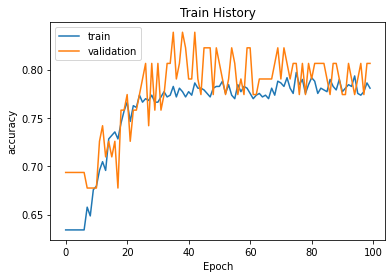

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

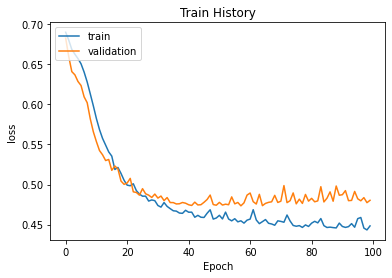

In [ ]:
show_train_history(train_history,'loss','val_loss')

In [ ]:
scores = model.evaluate(x=test_x, y=test_y)
print(scores[1])

5/5 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8052
0.8051947951316833


In [ ]:
Pregnancies = input('懷孕幾個月: ')
print('血糖: Default( 120.8945 )')
BloodPressure = input('血壓: ')
print('皮膚厚度: Default( 20.5365 )')
print('胰島素: Default( 79.7995 )')
BMI = input('BMI: ')
print('糖尿病風險值: Default( 0.4719 )')
Age = input('年齡')

Custom = pd.Series([Pregnancies, 120.8945, BloodPressure, 20.5365, 79.7995, BMI, 0.4719, Age])
Cus_df = pd.DataFrame([list(Custom)],
        columns=['Pregnancies',	'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
Cus_df




懷孕幾個月: 10
血糖: Default( 120.8945 )
血壓: 120
皮膚厚度: Default( 20.5365 )
胰島素: Default( 79.7995 )
BMI: 26
糖尿病風險值: Default( 0.4719 )
年齡21


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,120.8945,120,20.5365,79.7995,26,0.4719,21


In [ ]:
Cus_df = scaler.transform(Cus_df) #標準化
Cus_df

array([[0.58823529, 0.61057828, 0.98360656, 0.20743939, 0.09432565,
        0.38748137, 0.16818958, 0.        ]])

In [ ]:
all_probability = model.predict(Cus_df)
p = all_probability[0][0]
print('Probability: ',p)
if(p<0.5): print('Outcome: ', 0)
else: print('Outcome: ', 1)

Probability:  0.025981516
Outcome:  0
